<a href="https://colab.research.google.com/github/ashutoshsinha25/tensorflow-developement/blob/main/Computer%20Vision%20and%20Convolutional%20Neural%20Networks%20in%20TensorFlow/03_Introduction_too_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to convolutional neural network and computer vision with TensorFlow


* Computer Vision is a practice of writing algorithms which can discover patters in visual data. Such as the camera of self-driving car recognizing the car in front.

## Get the data

The images we are working with are form Food101 dataset; https://www.kaggle.com/dansbecker/food-101
However we've modified it to only use two classes( pizza and stake) using the image_data_modifier notebook in github: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb


# New Section

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# wget - get the file and downoad it in google colab drectory

--2022-04-14 10:19:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  42.3MB/s    in 2.5s    

2022-04-14 10:20:00 (42.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the downloaded file
zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

## Inspect the data( become one with the data)

A veru crucial step at the beginning of any ml project. For computer vision project, it means visualizing various data's

In [ ]:
!ls pizza_steak # ls- list

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os 

#  walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'there are {len(dirnames)} directory and {len(filenames)} images in {dirpath}.')

there are 2 directory and 0 images in pizza_steak.
there are 2 directory and 0 images in pizza_steak/train.
there are 0 directory and 750 images in pizza_steak/train/steak.
there are 0 directory and 750 images in pizza_steak/train/pizza.
there are 2 directory and 0 images in pizza_steak/test.
there are 0 directory and 250 images in pizza_steak/test/steak.
there are 0 directory and 250 images in pizza_steak/test/pizza.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 14 10:20 .
drwxr-xr-x 1 root root 4096 Apr 14 10:20 ..
drwxr-xr-x 4 root root 4096 Apr 14 10:20 test
drwxr-xr-x 4 root root 4096 Apr 14 10:20 train


In [ ]:
# Another way to find out how many images are in a file 
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualiza our images , first get the class names programmatically

In [ ]:
# get the class names programmatically 
import pathlib 
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))   #crete a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# LEt's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir , target_class):
  # setup the target directory

  target_folder = target_dir+target_class

  # get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # read in the image and plot it
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'image shape: {img.shape}')
  return img

['1241193.jpg']
image shape: (512, 512, 3)


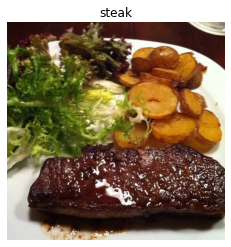

In [ ]:
# View a random image from training dataset 
img = view_random_image('pizza_steak/train/','steak')

['1426781.jpg']
image shape: (384, 512, 3)


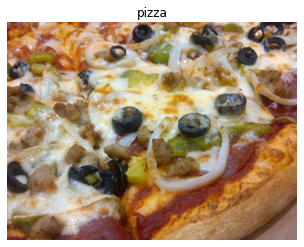

In [ ]:
# see for pizza
img = view_random_image('pizza_steak/train/','pizza')

In [ ]:
img

array([[[118,  61,  31],
        [127,  68,  50],
        [144,  80,  81],
        ...,
        [102,  69,  60],
        [144, 106, 103],
        [162, 123, 124]],

       [[142,  83,  51],
        [155,  94,  75],
        [169, 104, 102],
        ...,
        [123,  92,  71],
        [148, 113,  94],
        [166, 131, 112]],

       [[163, 100,  67],
        [181, 116,  94],
        [190, 121, 114],
        ...,
        [152, 124,  85],
        [162, 130,  91],
        [176, 143, 102]],

       ...,

       [[112,  46,  34],
        [110,  43,  34],
        [115,  44,  38],
        ...,
        [151, 120, 118],
        [149, 119, 119],
        [148, 118, 118]],

       [[111,  49,  38],
        [104,  40,  31],
        [104,  36,  35],
        ...,
        [150, 119, 117],
        [150, 119, 117],
        [152, 121, 119]],

       [[ 97,  37,  26],
        [ 98,  38,  30],
        [107,  41,  42],
        ...,
        [148, 117, 115],
        [149, 118, 116],
        [152, 121, 119]]

In [ ]:
# image we've imported and plotted are actually graint arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[118,  61,  31],
        [127,  68,  50],
        [144,  80,  81],
        ...,
        [102,  69,  60],
        [144, 106, 103],
        [162, 123, 124]],

       [[142,  83,  51],
        [155,  94,  75],
        [169, 104, 102],
        ...,
        [123,  92,  71],
        [148, 113,  94],
        [166, 131, 112]],

       [[163, 100,  67],
        [181, 116,  94],
        [190, 121, 114],
        ...,
        [152, 124,  85],
        [162, 130,  91],
        [176, 143, 102]],

       ...,

       [[112,  46,  34],
        [110,  43,  34],
        [115,  44,  38],
        ...,
        [151, 120, 118],
        [149, 119, 119],
        [148, 118, 118]],

       [[111,  49,  38],
        [104,  40,  31],
        [104,  36,  35],
        ...,
        [150, 119, 117],
        [150, 119, 117],
        [152, 121, 119]],

       [[ 97,  37,  26],
        [ 98,  38,  30],
        [107,  41,  42],
        ...,
        [148, 117, 11

In [ ]:
# View the image shape
img.shape # return width, height and color channels

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/225.

array([[[0.52444444, 0.27111111, 0.13777778],
        [0.56444444, 0.30222222, 0.22222222],
        [0.64      , 0.35555556, 0.36      ],
        ...,
        [0.45333333, 0.30666667, 0.26666667],
        [0.64      , 0.47111111, 0.45777778],
        [0.72      , 0.54666667, 0.55111111]],

       [[0.63111111, 0.36888889, 0.22666667],
        [0.68888889, 0.41777778, 0.33333333],
        [0.75111111, 0.46222222, 0.45333333],
        ...,
        [0.54666667, 0.40888889, 0.31555556],
        [0.65777778, 0.50222222, 0.41777778],
        [0.73777778, 0.58222222, 0.49777778]],

       [[0.72444444, 0.44444444, 0.29777778],
        [0.80444444, 0.51555556, 0.41777778],
        [0.84444444, 0.53777778, 0.50666667],
        ...,
        [0.67555556, 0.55111111, 0.37777778],
        [0.72      , 0.57777778, 0.40444444],
        [0.78222222, 0.63555556, 0.45333333]],

       ...,

       [[0.49777778, 0.20444444, 0.15111111],
        [0.48888889, 0.19111111, 0.15111111],
        [0.51111111, 0

## An end to end example

Let's build cnn to find patterns in our images, more specificially we need to :
* load our images
* preprocess our images
* build cnn to find patterns 
* compile our cnn
* fit our cnn on training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"# can be done by this our simly copy the path as doe above
# import data from directories and turn it into batches

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
# x and y is not passed here as flow_from_directory aldready create data and labels for our.
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 223ms/step - loss: 0.5753 - accuracy: 0.6913 - val_loss: 0.4454 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 12s 257ms/step - loss: 0.4286 - accuracy: 0.8127 - val_loss: 0.3519 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3940 - accuracy: 0.8160 - val_loss: 0.3162 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3530 - accuracy: 0.8427 - val_loss: 0.3135 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.2970 - accuracy: 0.8733 - val_loss: 0.3002 - val_accuracy: 0.8740


In [ ]:
model_1.summary()

> Two type of coding the same thing

* tf.keras.layers.Conv2D(10, 3, activation="relu")
* above code could be written as follows (which was seen in the cnn explainer site)
* tf.keras.layers.Conv2D(10,3),-->
 tf.keras.activations(tf.nn.relu)


## Using the same model as before 

[ TensorFlow model Link ](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.26720&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [ ]:
# same as of tensorflow playground model( previous section model to work with our image data)
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TEnsorFlow playground model
model_2 = tf.keras.Sequential([
                               
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


In [ ]:
# above is a non cnn model trying to find patterns in the image dataset but we can see by validation accuracy,
# which is 0.5000 which in turn is 50%, meaning our model is just guessing for every image wheather or not ,
# our image is of pizza or steak 


In [ ]:
# my experiment of above model
model_my = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (224,224,3)),
      tf.keras.layers.Dense(1000,activation='relu'),
      tf.keras.layers.Dense(1000,activation='relu'),
      tf.keras.layers.Dense(1000,activation='relu'),
      tf.keras.layers.Dense(1000,activation='relu'),
      tf.keras.layers.Dense(1000,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])
model_my.compile(loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics=['accuracy'])
model_my.fit(train_data,epochs=5,steps_per_epoch = len(train_data),validation_data = valid_data,validation_steps = len(valid_data))

In [ ]:
len(train_data)

In [ ]:
# Get a summary of model_2
model_2.summary()

Despite having 20x more parameters than our cnn(model_1), model_2 preforms terribily..... Let's try to imrpove it 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model

model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])

#Fit the model
model_3.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data=valid_data,validation_steps = len(valid_data))

In [ ]:
# summary of model_3
model_3.summary()

In [ ]:
model_my.summary()

In [ ]:
154534001/31000

In [ ]:
# model 3 has around 500 times the parameters than cnn model
# and model my has around 5000 times the parameters than cnn model 
# but still these two model does not perform as close to cnn model

In [ ]:
model_1.summary()

## Binary Classification: Let's break it down

1. Become one with the data (visuliza, visulizae, visulize)
2. Preprocess the data (prepare it for our model, the main step here aws scaling/normalizing & turning our data into batches)
3. Create a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model( try to beat ur baseline)
7. Repeat until satisfied( experiment, experiment, experiment)

#### 1. Become one with the data

In [ ]:
# Visuliza data

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [ ]:
tf.__version__

### 2. Preprocess the data

In [ ]:
# Define our directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

:> Our next step is to turn our data into **batches.**

A batch is a small subset of data. Rather than looking at all ~ 10000 images at one time, a model only look at 32 at a time.

It does for a couple of reasons:
1. 10000 images (or more) moight not fit into memory of your processor(GPU)
2. Trying to learn patterns in 10000 images in one hit cold result in the model not being able to learn very well.


Why 32??
Because 32 is good for your health... [link](https://twitter.com/ylecun/status/989610208497360896?lang=en)

In [ ]:
!nvidia-smi

In [ ]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
#load in our image data from directory and trun them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # target directory of images
                                               target_size = (224,224), # target size of the images(height,width)
                                               class_mode ='binary', # type of data your working with 
                                               batch_size=32) # size of mini to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

In [ ]:
# Get a sample of a train data batch
images , labels = train_data.next() # get the 'next' bacth of images/labels in train_data 
len(images),len(labels)

In [ ]:
# How many batches are there
len(train_data)

In [ ]:
#i.e. 
print(1500/32) , print((tf.round(1500/32)))

In [ ]:
# Get the first two images
images[:2],images[0].shape

In [ ]:
# View the first batch of labels
labels

### 3. Create a model (start with a base line)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting you try to beat the baseline.

> 🗝️ **Note:** In deep learning , there is almost ab infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce coomplexity as required(e.g. look at which currect model is preforming best in the field for your problem).

In [ ]:
# Make the creating of our model a little eaiser
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
# Create the model ( This will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
                      Conv2D(filters = 10, # filters is the number of sliding windows going across an input ( higher = more complex model)
                             kernel_size = 3,# the size of the sliding window going across an input
                             strides = 1, # the size of the step the sliding window takes across an input
                             padding = 'valid', # if 'same' output shape is same as input shape, if 'valid' output shape gets compressed
                             activation='relu',
                             input_shape = (224,224,3)), # input layer (specify input shape)
                      Conv2D(10,3,activation = 'relu'),
                      Conv2D(10,3,activation='relu'),
                      Flatten(),
                      Dense(1,activation='sigmoid') # output layer (working with binary classification)
])


In [ ]:
# Compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
# Get the summary of our model 
model_4.summary()

### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data) , len(test_data)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data , # this is a combinationof labels and sample data, so we dont need to pass x and y 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_my.evaluate(test_data)

In [ ]:
model_4.evaluate(test_data)

### 5. Evaluate our model

In [ ]:
# Let's plot the training curve using pandas
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves seperately

def plot_loss_curves(history):
  """
  returns seperate loss curves for training and validation matrix
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for?

  # Plot the loss
  plt.plot(epochs , loss , label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs , accuracy , label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

> 🗝️ **Note:** When a model's **validation loss starts to increasing**, its likely that the model is **overfitting** the training dataset. This means its learning pattern in the training dataset too well thus the models ability to generalize to unseen data will be diminished

In [ ]:
# Check out the oss and accuracy od model 4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline model
1. Beat the baseline by overfitting a larger model 
2. Reduce overfitting

Way's to induce overfitting:

* Increase the number of conv layers ( make nn deeper)
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer


Way's to reducr overfittingL

* Add data augmentation
* Add regularization layers( such as MaxPool2D)
* Add more data 
* ... and so on


> **Note:**- Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model( this is going to be our new baseline)

model_5 = Sequential([
          Conv2D(10,3,activation = 'relu' , input_shape=(224,224,3)),
          MaxPool2D(pool_size = 2),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(2),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(),
          Flatten(),
          Dense(1,activation='sigmoid')

])

In [ ]:
# Compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5  = model_5.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))

In [ ]:
# Summary of model_5
model_5.summary()

In [ ]:
# compare with model_4
model_4.summary()

In [ ]:
# Plot loss curve
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augamentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range = 0.02, # how much you want to rotate am image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image 
                                             width_shift_range = 0.2,# move your image around on the x-aaxis
                                             height_shift_range = 0.2,# move your image around on the y-axis
                                             horizontal_flip=True) # do you wamt to flip an image

# Create ImageDataGenerator without data augmentation for training

train_datagen = ImageDataGenerator(rescale=1/255)

# Create ImageDataGenerator without data augmentation for testing 

test_datagen = ImageDataGenerator(rescale=1/255)

> **Q:** What is data augmentation?

Data augmentation is the process of altering our training data leading it to have more diversity adn inturn allows our model to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar...


Lets visualiza data augmentation

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

🗝️ **Note:** Data augmentation is  usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are mofdified as they're loaded into the model


Finally, lets visualiza augmented data

In [ ]:
# Get sample data batches

images, labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next() # Labels are not augmented, only the data are augented.


In [ ]:
# Show the original imag and augmented image
import random
random_number = random.randint(0,32) # our batch size is 32
print(f'showing image number {random_number}')
plt.imshow(images[random_number])
plt.title(f"orginal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [ ]:

model_5.summary()

In [ ]:
model_6_my = Sequential([
                         Conv2D(filters = 10,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
                         MaxPool2D(pool_size=(2,2)),
                         Conv2D(10,3,activation='relu'),
                         MaxPool2D(pool_size=2),
                         Conv2D(10,3,activation='relu'),
                         MaxPool2D(),
                         Flatten(),
                         Dense(1,activation='sigmoid')

])
model_6_my.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                   optimizer = Adam(),
                   metrics=['accuracy'])
model_6_my.fit(train_data_augmented,
               epochs=5,
               steps_per_epoch = len(train_data_augmented),
               validation_data = test_data,
               validation_steps = len(test_data))


Now we've seen what augmented data look's like, let's build a model and see how it learn's on the augmented data

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# fitting model on augmented data here takes more time than normal data as augmented data is being processed(generated) on the fly and are not actually saved in the directory
# as compared to normal data which is saved in the directory making it easier to access during fitting task

In [ ]:
# Check out model's training curve
plot_loss_curves(history_6)

> Even after performing data augmentation, it seem's like our model is not performing very well( not even close to the previos model i.e. model_5). So now let's try to augment data again but now let's try to shuffle the data which we didnot do in the previous part

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# PLot the loss curve
plot_loss_curves(history_7)

> When data is shuffled, data is being looked at randomly but is shuffle is False, our model will look(learn ) while training in a sequential fashion. This causes a back flip problem for our model as for the first half our model might be learning patterns in a perticular type of dataset(our case pizza) and when next type of data comes( our case steak), our model has to adjust its patterns accordingly to that.

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are few thing we could try to continue to imrpove our model:

* Increase the number of model layers( e.g. add more conv2d/ maxpool2d)
* Increase the number of filters in each conv layer(e.g. from 10 to 32 or even 64)
* train for longer( more epochs)
* Find an ideal learning rate
* Get more data ( give the model more opportunities to learn)
* Use **Tansfer Learning** to levrage what another image model has learned and adjust it for our own use case.

In [ ]:
# Practice ( cnn explained model)

model_8 = Sequential([
                      Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
                      Conv2D(32,3,activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10,3,activation='relu'),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1,activation='sigmoid')
])
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Loss curve for tiny vgg model 
plot_loss_curves(history_8)

In [ ]:
# Comparing it with model_1
plot_loss_curves(history_1)

In [ ]:
# our curve for model_8 looks much smoother than model_1 
# Finally let's try to fit the model for more epochs

model_9 = Sequential([
                      Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10,3,activation='relu'),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1,activation='sigmoid')
])
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=25,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps = len(test_data))

In [ ]:
# PLot the loss curve
plot_loss_curves(history_9)

In [ ]:
model_9.evaluate(test_data)

In [ ]:
model_8.evaluate(test_data)

In [ ]:
# Trying with increased filter number.

model_10 = Sequential([
                      Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
                      Conv2D(32,3,activation='relu'),
                      MaxPool2D(2),
                      Conv2D(32,3,activation='relu'),
                      Conv2D(32,3,activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1,activation='sigmoid')
])
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_10 = model_9.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps = len(test_data))

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_10.evaluate(test_data)

## Making a prediction with our trained model on our custome data

In [ ]:
# Classes we're working on 
print(class_names)

In [ ]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

In [ ]:
steak

In [ ]:
model_7(steak)

In [ ]:
expanded_steak = tf.expand_dims(steak,axis=0).shape

In [ ]:
model_7(expanded_steak)

> When you train a nn and you want make a prediction with it on your own custome data, it is import that your custome data or new data is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  '''
  reads and image from filename and turns it into a tensor 
  and reshape it to (img_shape,img_shape,color_channels).
  '''

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img,size = [img_shape,img_shape])
  #Rescale the img and get all values between 0 and 1
  img = img/255
  return img



In [ ]:
# Load in and preprocess our custome image
steak = load_and_prep_image('/content/03-steak.jpeg')
steak

In [ ]:
model_7.predict(steak)

In [ ]:
# make a prediction
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

In [ ]:
steak.ndim

Looks like our custome image is being put through our model, however it currently outputs a prediction probability. Wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class name
class_names

In [ ]:
#We can index the predicted class by arounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  '''import and image located at filename, make a prediction with the model and
  plots the image with predicted class as the title'''

  # Import the target img
  img = load_and_prep_image(filename)
  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))
  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
#Test our mode
pred_and_plot(model_7,"03-steak.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,"03-pizza-dad.jpeg")

# Multi-class image classification

These are the same steps we followed in the binary image classification (i.e. our pizza and steak model) and for multiclass image classification, few adjustments are to be made but the process remains the same.


1. Become one with the data
2. Preprocess the data( get it ready for a model).
3. Create a model (start with a baseline).
4. Fit the model( overfit it to make sure it work).
5. Evaluate the model
6. Adjust the different hyperparameters and imrpove the model (try to beat baselinereduce overfitting).
7. Repeat until satisfied.


### 1. Become on with the data

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

## 1. Import and become one with the data

In [ ]:


import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-01-18 16:52:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   214MB/s    in 2.3s    

2022-01-18 16:52:49 (214 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk through 10 classes 
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 10 directories and 0 ima

In [ ]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Jan 18 16:52 .
drwxr-xr-x  1 root root 4096 Jan 18 16:52 ..
drwxr-xr-x 12 root root 4096 Jan 18 16:52 test
drwxr-xr-x 12 root root 4096 Jan 18 16:52 train


In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names ( without using tensorflow)
import pathlib 
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# demo random.choice
import random
random.choice(class_names)

'grilled_salmon'

['2577377.jpg']
image shape: (512, 512, 3)


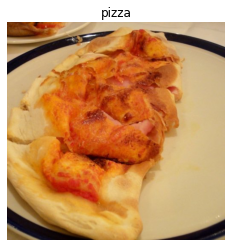

In [ ]:
# Visualize the data
import random

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=32,
                                               class_mode='categorical')
                                              #  shuffle=True) shuffle is by default true
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
test_data.dtype

'float32'

In [ ]:
test_data.next()

(array([[[[0.6431373 , 0.3921569 , 0.2509804 ],
          [0.6431373 , 0.38431376, 0.24705884],
          [0.6313726 , 0.37254903, 0.23529413],
          ...,
          [0.07843138, 0.09019608, 0.04705883],
          [0.07843138, 0.08627451, 0.04313726],
          [0.07450981, 0.08235294, 0.03921569]],
 
         [[0.6627451 , 0.4039216 , 0.2784314 ],
          [0.654902  , 0.38431376, 0.25490198],
          [0.6509804 , 0.3803922 , 0.2509804 ],
          ...,
          [0.09019608, 0.09019608, 0.05882353],
          [0.08235294, 0.08235294, 0.0509804 ],
          [0.08235294, 0.08235294, 0.0509804 ]],
 
         [[0.6784314 , 0.40784317, 0.29411766],
          [0.6627451 , 0.3921569 , 0.2784314 ],
          [0.6509804 , 0.37254903, 0.2627451 ],
          ...,
          [0.16078432, 0.14901961, 0.12941177],
          [0.15294118, 0.14117648, 0.12156864],
          [0.15294118, 0.14117648, 0.12156864]],
 
         ...,
 
         [[0.05882353, 0.09411766, 0.09019608],
          [0.06274

### 3. Create a model (start with a baseline)

In [ ]:
# creating the same model as cnn explainer 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


# Create the model excalty like cnn explainer we can always put activation  ='relu inside layers but we decided 
# to replicat cnn explainer model and seperate the activation layers.... 
model_11 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3),
    Activation(activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3),
    Activation(activation='relu'),
    Conv2D(10,3),
    Activation(activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10,activation='softmax')
])

# Compile the model

model_11.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

### 4. Fit the model

In [ ]:
# Fit the model
history_11 = model_11.fit(train_data,
                          epochs=5,
                          steps_per_epoch = len(train_data),
                          validation_data=test_data,
                          validation_steps=int(0.25*len(test_data))
                          )

Epoch 1/5
235/235 [==============================] - 57s 199ms/step - loss: 2.1510 - accuracy: 0.2124 - val_loss: 1.9879 - val_accuracy: 0.2763
Epoch 2/5
235/235 [==============================] - 46s 197ms/step - loss: 1.9052 - accuracy: 0.3357 - val_loss: 1.9569 - val_accuracy: 0.3109
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.6545 - accuracy: 0.4449 - val_loss: 1.9877 - val_accuracy: 0.3026
Epoch 4/5
235/235 [==============================] - 47s 198ms/step - loss: 1.1778 - accuracy: 0.6125 - val_loss: 2.2581 - val_accuracy: 0.2862
Epoch 5/5
235/235 [==============================] - 47s 200ms/step - loss: 0.5249 - accuracy: 0.8309 - val_loss: 2.9398 - val_accuracy: 0.2944


In [ ]:
len(train_data)

235

### 5. Evaluate the model

In [ ]:
# Evaluate on test data
model_11.evaluate(test_data)
# model is doing better than guessing , as for 10 even classes , gusessing would be 10% 

79/79 [==============================] - 13s 163ms/step - loss: 3.0220 - accuracy: 0.2964


[3.0220422744750977, 0.2964000105857849]

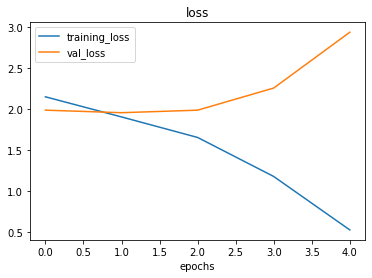

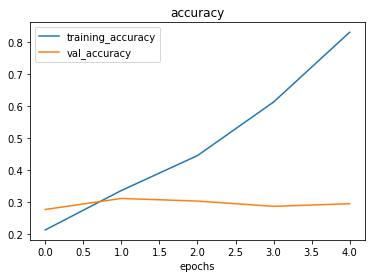

In [ ]:
# Check the loss curve of our model
plot_loss_curves(history_11)

What do these loss curve tell us.?

Wel... it seem our model is **overfittin** the training set quite badly.. in other words, it's getting great results on the training data but fails to generalize well to unseen data and perform poorly on the test dataset

### 6. Adjust the model hyperparameters to beat the baseline (to beat the baseline/reduce the overfitting)


Due to its performace on the training data, it;s clearn our model is learning something...
HOwever, it's not generalizing well to unseen data, so let's try and fix it..

* **Get more data** - having more data gives a model more opportunity to learn diverse patters.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, ine way to simplify is to : reduce no. of layers , reduce no. of hidden units in the layer
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it( without altering the original data).
* **transfer Learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterms on your dataset


In [ ]:
# How about we simplify our model first 
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                        

In [ ]:
# Let's try to remove two conv layer's
model_12 = Sequential([
                       Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                       MaxPool2D(2),
                       Conv2D(10,3,activation='relu'),
                       MaxPool2D(2),
                       Flatten(),
                       Dense(10,activation='softmax')
])
model_12.compile(loss = 'categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


In [ ]:
# fit the model (without two conv layers)
history_12 = model_12.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=int(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 42s 178ms/step - loss: 2.1771 - accuracy: 0.2016 - val_loss: 2.0328 - val_accuracy: 0.2911
Epoch 2/5
235/235 [==============================] - 42s 177ms/step - loss: 1.7535 - accuracy: 0.4056 - val_loss: 1.9108 - val_accuracy: 0.3322
Epoch 3/5
235/235 [==============================] - 42s 177ms/step - loss: 1.2967 - accuracy: 0.5765 - val_loss: 2.1410 - val_accuracy: 0.2878
Epoch 4/5
235/235 [==============================] - 42s 178ms/step - loss: 0.8016 - accuracy: 0.7553 - val_loss: 2.4739 - val_accuracy: 0.2878
Epoch 5/5
235/235 [==============================] - 42s 177ms/step - loss: 0.4321 - accuracy: 0.8803 - val_loss: 3.0522 - val_accuracy: 0.2368


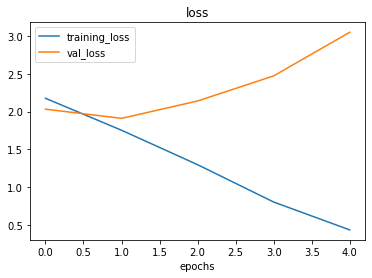

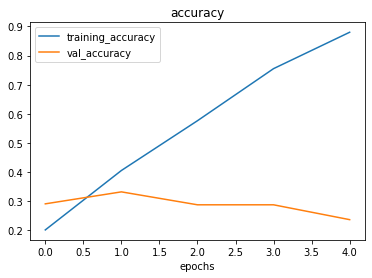

In [ ]:
#PLotting loss curve
plot_loss_curves(history_12)

Look's like our " simplifying the model " experiement didn't work... The accuracy went down and overfitting continued.
How aboutwe try data augmentation?

### Trying to reduce overfitting with data augmentation


Let's try and imrpove our model's results by using augmented training data....

Ideally, we want to:
* Reduce overfitting ( get the train and validation loss curve closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator 
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# makeing tiny vgg model
model_vgg = Sequential([
                        Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)),
                        Conv2D(10,3,activation='relu'),
                        MaxPool2D(2),
                        Conv2D(10,3,activation='relu'),
                        Conv2D(10,3,activation='relu'),
                        MaxPool2D(),
                        Flatten(),
                        Dense(10,activation='sigmoid')
                        
])

In [ ]:
# Let's create another model but this time we will fit it on augmented data 
model_13 = tf.keras.models.clone_model(model_vgg)

# Compile the cloned model using same setup as previous model's

model_13.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [ ]:
model_13.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# Fit the model 
history_13 = model_13.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 562ms/step - loss: 2.2555 - accuracy: 0.1540 - val_loss: 2.0862 - val_accuracy: 0.2608
Epoch 2/5
235/235 [==============================] - 133s 564ms/step - loss: 2.0894 - accuracy: 0.2553 - val_loss: 1.9106 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 132s 561ms/step - loss: 2.0138 - accuracy: 0.2889 - val_loss: 1.8481 - val_accuracy: 0.3552
Epoch 4/5
235/235 [==============================] - 130s 555ms/step - loss: 1.9671 - accuracy: 0.3084 - val_loss: 1.9302 - val_accuracy: 0.3284
Epoch 5/5
235/235 [==============================] - 130s 552ms/step - loss: 1.9345 - accuracy: 0.3301 - val_loss: 1.8309 - val_accuracy: 0.3784


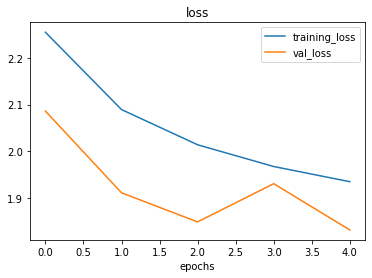

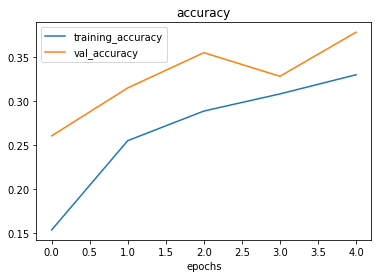

In [ ]:
# Plot loss curves
plot_loss_curves(history_13)

Waoh! that  looks much better, the loss curves ar much closer to each other than the baseline model and they look like they're heading in the right direction( certainly not the worng direction) so fi we were to train for longer, we might see further improvement

### 7. Repeat until satisfied

we could keep going here.... continually trying to bring our loss curves closer together and trying to imrpove the validatio/test accuracy.

HOW?

BY running lots of experiements, namely:
- restructuring our model's architucture ( increasing layers/ hidden units).
- adjust the learning rate
- try different method of data augmentation(adjust the hyperparamaters in our ImageDataGenerator instance)
- training for longer duration
- try **transfer learning** 

### Make a prediction with our trained model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# download some custome images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg




--2022-01-18 17:45:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-01-18 17:45:35 (33.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-01-18 17:45:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
# make a prediction using model_13 
pred_and_plot(model = model_13 , 
              filename = '03-pizza-dad.jpeg',
              class_names = list(class_names))

TypeError: ignored

In [ ]:
# Reconfig pred_and_plot function to work with multiclass prediction
def pred_and_plot(model,filename,class_names=class_names):
  '''import and image located at filename, make a prediction with the model and
  plots the image with predicted class as the title'''

  # Import the target img
  img = load_and_prep_image(filename)
  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))
  # Add in logic for multi class and get pred class name
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

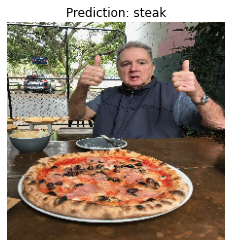

In [ ]:
# make a prediction using model_13 
pred_and_plot(model = model_13 , 
              filename = '03-pizza-dad.jpeg',
              class_names = class_names)

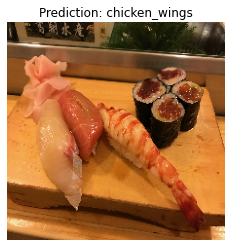

In [ ]:
pred_and_plot(model = model_13 , 
              filename = '03-sushi.jpeg',
              class_names = class_names)

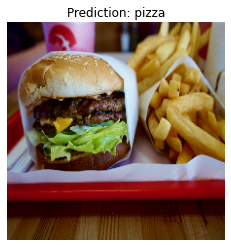

In [ ]:

pred_and_plot(model = model_13 , 
              filename = '03-hamburger.jpeg',
              class_names = class_names)

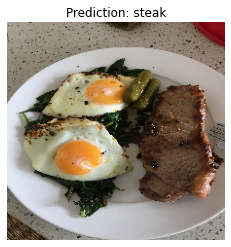

In [ ]:
pred_and_plot(model = model_13 , 
              filename = '03-steak.jpeg',
              class_names = class_names)